<a href="https://colab.research.google.com/github/yhlyyuu/ML/blob/main/HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# 載入相關套件
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from google.colab import files
uploaded = files.upload()  # 會跳出選擇檔案視窗，請選擇 your_faces.zip


Saving myface.zip to myface.zip


In [3]:
import zipfile
import os

# 解壓縮
with zipfile.ZipFile("myface.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

# 檢查解壓後目錄結構
os.listdir("myface/face")


['IMG_1050.JPG',
 'DSC02162.JPG',
 'IMG_0313.JPG',
 'IMG_1261.jpg',
 'DSC02127.JPG',
 'IMG_0092.JPG',
 'IMG_0085.JPG',
 'IMG_1519.JPG',
 'IMG_1480.jpg',
 'IMG_1301.JPG',
 'IMG_0308.JPG',
 'IMG_1079.JPG',
 'IMG_1255.JPG',
 'IMG_0095.JPG',
 'IMG_0310.JPG',
 'IMG_1253.JPG',
 'DSC02164.JPG',
 'DSC02423.JPG',
 'IMG_0309.JPG',
 'IMG_0332.JPG',
 'IMG_1532.jpg',
 'DSC02544.JPG',
 'DSC02532.JPG',
 'IMG_1081.JPG',
 'DSC02688.JPG',
 'IMG_0235.JPG',
 'IMG_0531.JPG',
 'IMG_0273.JPG',
 'DSC02536.JPG',
 'IMG_0312.JPG',
 'IMG_0530.JPG',
 'IMG_1518.JPG',
 'IMG_0589.jpg',
 'IMG_1538.jpg',
 'IMG_0102.JPG',
 'IMG_0008.JPG',
 'IMG_0841.jpg',
 'DSC02128.JPG',
 'IMG_0272.JPG',
 'IMG_0316.JPG',
 'IMG_0499.JPG',
 'IMG_0575.JPG',
 'IMG_1935.JPG',
 'IMG_1078.JPG',
 'IMG_1039.JPG',
 'IMG_1077.JPG',
 'IMG_0550.JPG',
 'IMG_0913.jpg',
 'DSC02689.JPG',
 'IMG_0274.JPG',
 'IMG_0001.JPG',
 'IMG_0315.JPG',
 'IMG_0093.JPG',
 'IMG_0094.JPG',
 'IMG_0275.JPG',
 'IMG_0547.JPG',
 'IMG_1537.jpg',
 'IMG_0879.jpg',
 'IMG_1531.jpg

In [4]:
from tensorflow import keras

dataset = keras.preprocessing.image_dataset_from_directory(
    "myface",
    label_mode=None,           # 沒有標籤
    image_size=(64, 64),
    batch_size=32
)

# 正規化像素值
dataset = dataset.map(lambda x: x / 255.0)


Found 102 files.


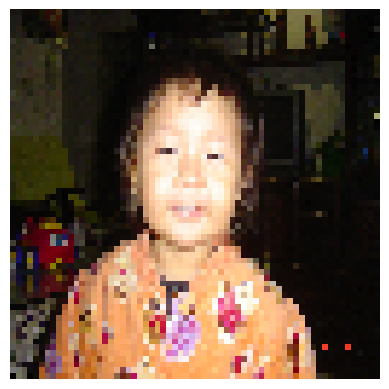

In [5]:

# 載入並顯示第一個圖檔
image = next(iter(dataset))
plt.axis("off")
plt.imshow((image.numpy() * 255).astype("int32")[0])

=== 檢查原始數據 ===
數據形狀: (32, 64, 64, 3)
數據範圍: 0.0 到 1.0


<ipython-input-26-12a810e94640>:14: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-26-12a810e94640>:14: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-26-12a810e94640>:14: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-26-12a810e94640>:14: UserWarning: Glyph 29255 (\N{CJK UNIFIED IDEOGRAPH-7247}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io

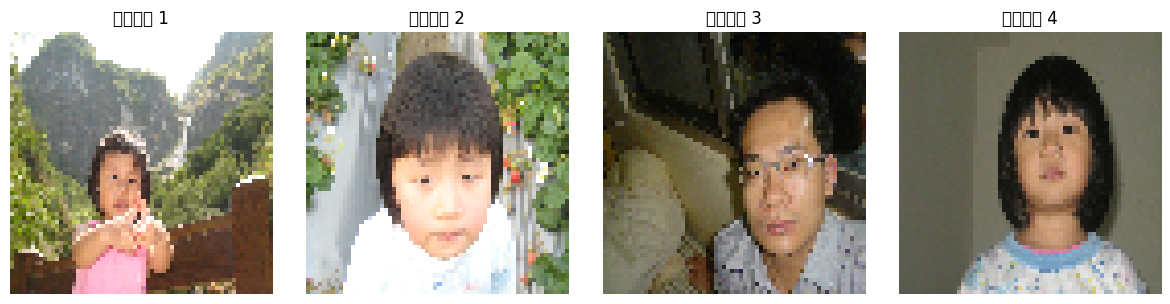

In [26]:
# 1. 首先檢查你的原始數據
print("=== 檢查原始數據 ===")
for batch in dataset.take(1):
    print(f"數據形狀: {batch.shape}")
    print(f"數據範圍: {batch.numpy().min()} 到 {batch.numpy().max()}")

    # 顯示前4張原始圖片
    plt.figure(figsize=(12, 3))
    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.imshow(batch[i])
        plt.title(f"原始圖片 {i+1}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    break

In [6]:
for batch in dataset.take(1):
    print(batch.shape)  # 預期： (32, 64, 64, 3)


(32, 64, 64, 3)


In [18]:
# 重新定義discriminator，降低其能力
discriminator = keras.Sequential(
    [
        keras.Input(shape=(64, 64, 3)),
        layers.Conv2D(32, kernel_size=4, strides=2, padding="same"),  # 減少filters
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),  # 增加dropout
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),  # 減少filters
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator",
)
discriminator.summary()

Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 128)      │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         8,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,793 (678.88 KB)

 Trainable params: 173,793 (678.88 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:

# 生成神經網路
latent_dim = 128

generator = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)),
        layers.Dense(8 * 8 * 128),
        layers.Reshape((8, 8, 128)),
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(3, kernel_size=5, padding="same", activation="sigmoid"),

    ],
    name="generator",
)
generator.summary()

Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 8192)           │     1,056,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 16, 16, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 32, 32, 256)    │       524,544 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 64, 64, 512)    │     2,097,664 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 64, 64, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 3)      │        38,403 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,979,651 (15.18 MB)

 Trainable params: 3,979,651 (15.18 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# 自定義 GAN 類別
class GAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(GAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def train_step(self, real_images):
        batch_size = tf.shape(real_images)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        generated_images = self.generator(random_latent_vectors)
        combined_images = tf.concat([generated_images, real_images], axis=0)
        labels = tf.concat([
            tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))
        ], axis=0)
        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_weights))

        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        misleading_labels = tf.zeros((batch_size, 1))
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {"d_loss": self.d_loss_metric.result(), "g_loss": self.g_loss_metric.result()}

In [22]:
class ImprovedGAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(ImprovedGAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(ImprovedGAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def train_step(self, real_images):
        batch_size = tf.shape(real_images)[0]

        # 訓練discriminator
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        generated_images = self.generator(random_latent_vectors)

        # 組合真實和生成的圖像
        combined_images = tf.concat([generated_images, real_images], axis=0)

        # 創建標籤，並添加噪音以減少discriminator過度自信
        labels = tf.concat([
            tf.zeros((batch_size, 1)),  # 生成圖像標籤
            tf.ones((batch_size, 1))    # 真實圖像標籤
        ], axis=0)
        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        # 訓練discriminator
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images, training=True)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_weights))

        # 訓練generator
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        misleading_labels = tf.ones((batch_size, 1))  # Generator想要discriminator認為是真的

        with tf.GradientTape() as tape:
            generated_images = self.generator(random_latent_vectors, training=True)
            predictions = self.discriminator(generated_images, training=False)
            g_loss = self.loss_fn(misleading_labels, predictions)

        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {"d_loss": self.d_loss_metric.result(), "g_loss": self.g_loss_metric.result()}

# 修正的監控回調
class ImprovedGANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.normal(shape=(self.num_img, self.latent_dim))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images = generated_images * 255.0  # 正確的還原
        generated_images = tf.clip_by_value(generated_images, 0, 255).numpy().astype("uint8")

        for i in range(self.num_img):
            img = generated_images[i]
            plt.imsave(f"./GAN_generated/improved_img_{epoch:03d}_{i}.jpg", img)

In [11]:

if not os.path.exists("./GAN_generated"):
    os.makedirs("./GAN_generated")

In [27]:

# 訓練模型
epochs = 50  # 訓練週期正常需要100次

improved_gan = ImprovedGAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
improved_gan.compile(
    d_optimizer=keras.optimizers.Adam(5e-5),  # 稍微提高學習率
    g_optimizer=keras.optimizers.Adam(5e-5),
    loss_fn=keras.losses.BinaryCrossentropy(),
)
# 產生10張圖像
improved_gan.fit(
    dataset,
    epochs=30,
    callbacks=[ImprovedGANMonitor(num_img=5, latent_dim=latent_dim)]
)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - d_loss: 0.3377 - g_loss: 1.6818
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 818ms/step - d_loss: 0.3789 - g_loss: 1.9029
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 755ms/step - d_loss: 0.4026 - g_loss: 1.5207
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 712ms/step - d_loss: 0.3631 - g_loss: 1.3720
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 774ms/step - d_loss: 0.2717 - g_loss: 1.4526
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 685ms/step - d_loss: 0.3758 - g_loss: 1.6018
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 967ms/step - d_loss: 0.3537 - g_loss: 1.4758
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 708ms/step - d_loss: 0.2916 - g_loss: 1.2937
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 680ms/step - d_loss: 0.2700 - g_loss: 1.2214
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - d_loss: 0.2863 - g_loss: 1.2989
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 683ms/step - d_loss: 0.2578 - g_loss: 1.4031
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 685ms/step - d_loss: 0.2177 - g_loss: 1

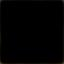

In [29]:

from IPython.display import Image

Image("./GAN_generated/img_000_0.jpg")